In [3]:
from tensorflow.keras.datasets import imdb 
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as plt

In [4]:
# num_word = 10000 단어사전에서 10000개 단어만 가져오겟다.
(train_data , train_labels),  (test_data , test_labels) = imdb.load_data(num_words=10000)


In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
len(train_data[0])

218

In [7]:
# 긍정 1 부정 0 
# 첫번째 리뷰의 답 확인 
train_labels[0]

1

In [8]:
# 리뷰가운데 최대길이
# 리뷰들의 길이 
# 만단어 이내로 들어가 있는
max([max(seq) for seq in train_data])

9999

In [9]:
word_index= imdb.get_word_index() 
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
decoded_review =  " ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
def vectorize_seqs(seqs,dims = 10000):
    results = np.zeros((len(seqs),dims))
    for i ,seq in enumerate(seqs):
        for j in seq:
            results[i,j] = 1
    return results

In [12]:
x_train = vectorize_seqs(train_data)
x_test = vectorize_seqs(test_data)
x_train.shape ,x_test.shape

((25000, 10000), (25000, 10000))

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
type(train_labels)

numpy.ndarray

In [15]:
np.asarray(train_labels).astype('float32')
np.asarray(test_labels).astype('float32')

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [16]:
model = keras.Sequential([
    layers.Dense(16,activation = 'relu')
    ,layers.Dense(16,activation = 'relu')
    ,layers.Dense(1,activation = 'sigmoid')
])
# 0-1까지 백터센트 로 만든다.
# 유닛이 하나일경우이기에 시그모이드를 사용한다
# 유닛이 한개인이유는 원래답이 0-1 d이여서 그렇다
# 타겟의 범위를 맞춰준다. 시그모이드펑션에 태운다
# 0에 가까워진다
# 오차도 연속값이기에 계속나와야한다
# 소프트맥스가 맞다
# 원래답을 수정하는것이니까.


In [17]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [18]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


30/30 [==============================] - 2s 29ms/step - loss: 0.5229 - accuracy: 0.7868 - val_loss: 0.3983 - val_accuracy: 0.8628
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3282 - accuracy: 0.8939 - val_loss: 0.3627 - val_accuracy: 0.8509
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2506 - accuracy: 0.9162 - val_loss: 0.2927 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2024 - accuracy: 0.9329 - val_loss: 0.2963 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1704 - accuracy: 0.9444 - val_loss: 0.2746 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1449 - accuracy: 0.9521 - val_loss: 0.2804 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1232 - accuracy: 0.9617 - val_loss: 0.3046 - val_accuracy: 0.8797
Epoch 8/20


In [21]:
history.history
# 대기하는 함수# 딕션너리 학습데이터에 대한

{'loss': [0.5228787660598755,
  0.3281809687614441,
  0.2506042718887329,
  0.20235195755958557,
  0.17036741971969604,
  0.14494891464710236,
  0.12319013476371765,
  0.10407119989395142,
  0.0873209536075592,
  0.07754269987344742,
  0.06485094130039215,
  0.052076686173677444,
  0.04553791508078575,
  0.04025230184197426,
  0.02923744171857834,
  0.02680380642414093,
  0.0218609981238842,
  0.018669575452804565,
  0.013367650099098682,
  0.013741511851549149],
 'accuracy': [0.7868000268936157,
  0.8939333558082581,
  0.9161999821662903,
  0.9329333305358887,
  0.9444000124931335,
  0.9520666599273682,
  0.961733341217041,
  0.9715333580970764,
  0.9762666821479797,
  0.9802666902542114,
  0.9839333295822144,
  0.9890000224113464,
  0.991266667842865,
  0.9914666414260864,
  0.9955999851226807,
  0.9965999722480774,
  0.996666669845581,
  0.9972666501998901,
  0.9991333484649658,
  0.998199999332428],
 'val_loss': [0.3982980251312256,
  0.3627176880836487,
  0.2927345335483551,
  0.2

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

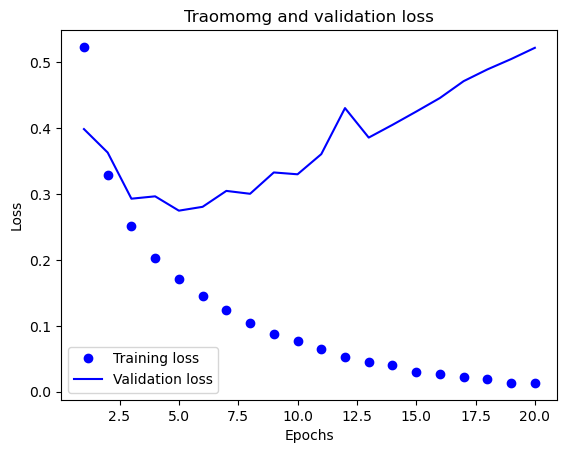

In [25]:
# 시각화
# 유닛
import matplotlib.pyplot as plt 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(
    epochs
    ,loss_values
    ,'bo'
    , label = 'Training loss'
)
plt.plot(
    epochs
    ,val_loss_values
    ,'b'
    ,label = 'Validation loss'
)
plt.title('Traomomg and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()# 
#print(loss_values,end=',')

In [24]:
# 이진분류가 크로스 엔트로피를 사용해야 좋다
# 오차함수 오차값 크로스엔트로피에 대한 분류에선 무조건 확률가지고 한다. 뺏는데 변화가 없으면 학습이 완료된다.
# 왕창빼기신경망웨이트가 어떻게수정되는지 
# 크로스될오차함수이다. 반대ㅠㅕㄴ의 mse는오차만 구하는데 crosse트로피는 오차를 ㅗㄱㅂ하는것 
ㅠ

NameError: name 'ᅲ' is not defined

In [26]:
history.history

{'loss': [0.5228787660598755,
  0.3281809687614441,
  0.2506042718887329,
  0.20235195755958557,
  0.17036741971969604,
  0.14494891464710236,
  0.12319013476371765,
  0.10407119989395142,
  0.0873209536075592,
  0.07754269987344742,
  0.06485094130039215,
  0.052076686173677444,
  0.04553791508078575,
  0.04025230184197426,
  0.02923744171857834,
  0.02680380642414093,
  0.0218609981238842,
  0.018669575452804565,
  0.013367650099098682,
  0.013741511851549149],
 'accuracy': [0.7868000268936157,
  0.8939333558082581,
  0.9161999821662903,
  0.9329333305358887,
  0.9444000124931335,
  0.9520666599273682,
  0.961733341217041,
  0.9715333580970764,
  0.9762666821479797,
  0.9802666902542114,
  0.9839333295822144,
  0.9890000224113464,
  0.991266667842865,
  0.9914666414260864,
  0.9955999851226807,
  0.9965999722480774,
  0.996666669845581,
  0.9972666501998901,
  0.9991333484649658,
  0.998199999332428],
 'val_loss': [0.3982980251312256,
  0.3627176880836487,
  0.2927345335483551,
  0.2

In [ ]:
loss_values = history_dict['loss']
acc = history_dict['validation']
epochs = range(1,len(loss_values)+1)
plt.plot(
    epochs
    ,loss_values
    ,'bo'
    , label = 'Training loss'
)
plt.plot(
    epochs
    ,val_loss_values
    ,'b'
    ,label = 'Validation loss'
)
plt.title('Traomomg and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()# 


In [ ]:
# 3500rodml flqb
# 시그모이드를 태워서 영부터 1까지 1에 가깝다
# 어정쩡한 데이터는  0.1가까워지면 부정
# 1에 대한 키운다 크로스 엔 트로피
# 0.65이0.9나 92크로스한0.65가 긍부정이 아니다, 쓰레기 예측값
# 0.01또는 0.99이상이때 확실하다. 
# 정보의 확실성 교차검증을 했다. 
# 0.5에 가까워질수록 안좋다......................
# 레이어는 재표현층이다. 
# 오차는 그안에서 오차만때려잡는다. 확률적인 것을 잡는다.
# 미리 이야기하자면 이진 분류가 바이너리 크로스벨류  마이너스 무한대부터 +무한대까지
# 마이너스 1 부터 플러스 1까지 
# 렐루는 정규화
# 데이터 빼면 크로스엔트로피가 핵심이다
# .
